In [84]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [3]:
data = pd.read_excel('Churn_Modelling.xlsx', header = 0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(10000, 14)
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [4]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [8]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [26]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [27]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<BarContainer object of 10000 artists>

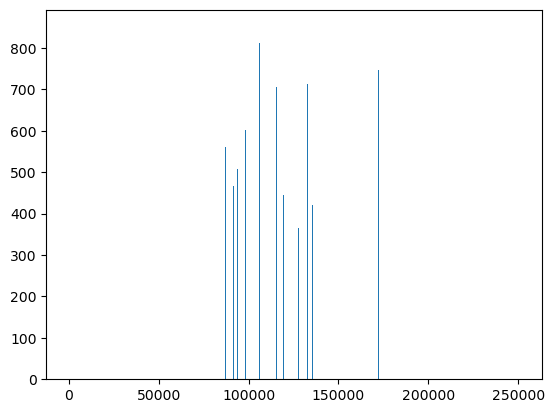

In [37]:
plt.bar(data['Balance'],data['CreditScore'])

<BarContainer object of 10000 artists>

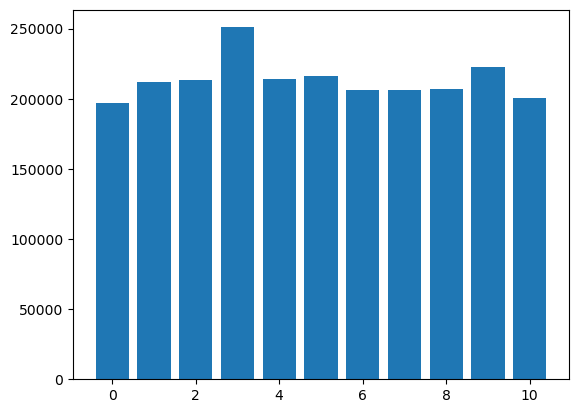

In [39]:
plt.bar(data['Tenure'],data['Balance'])

array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>]],
      dtype=object)

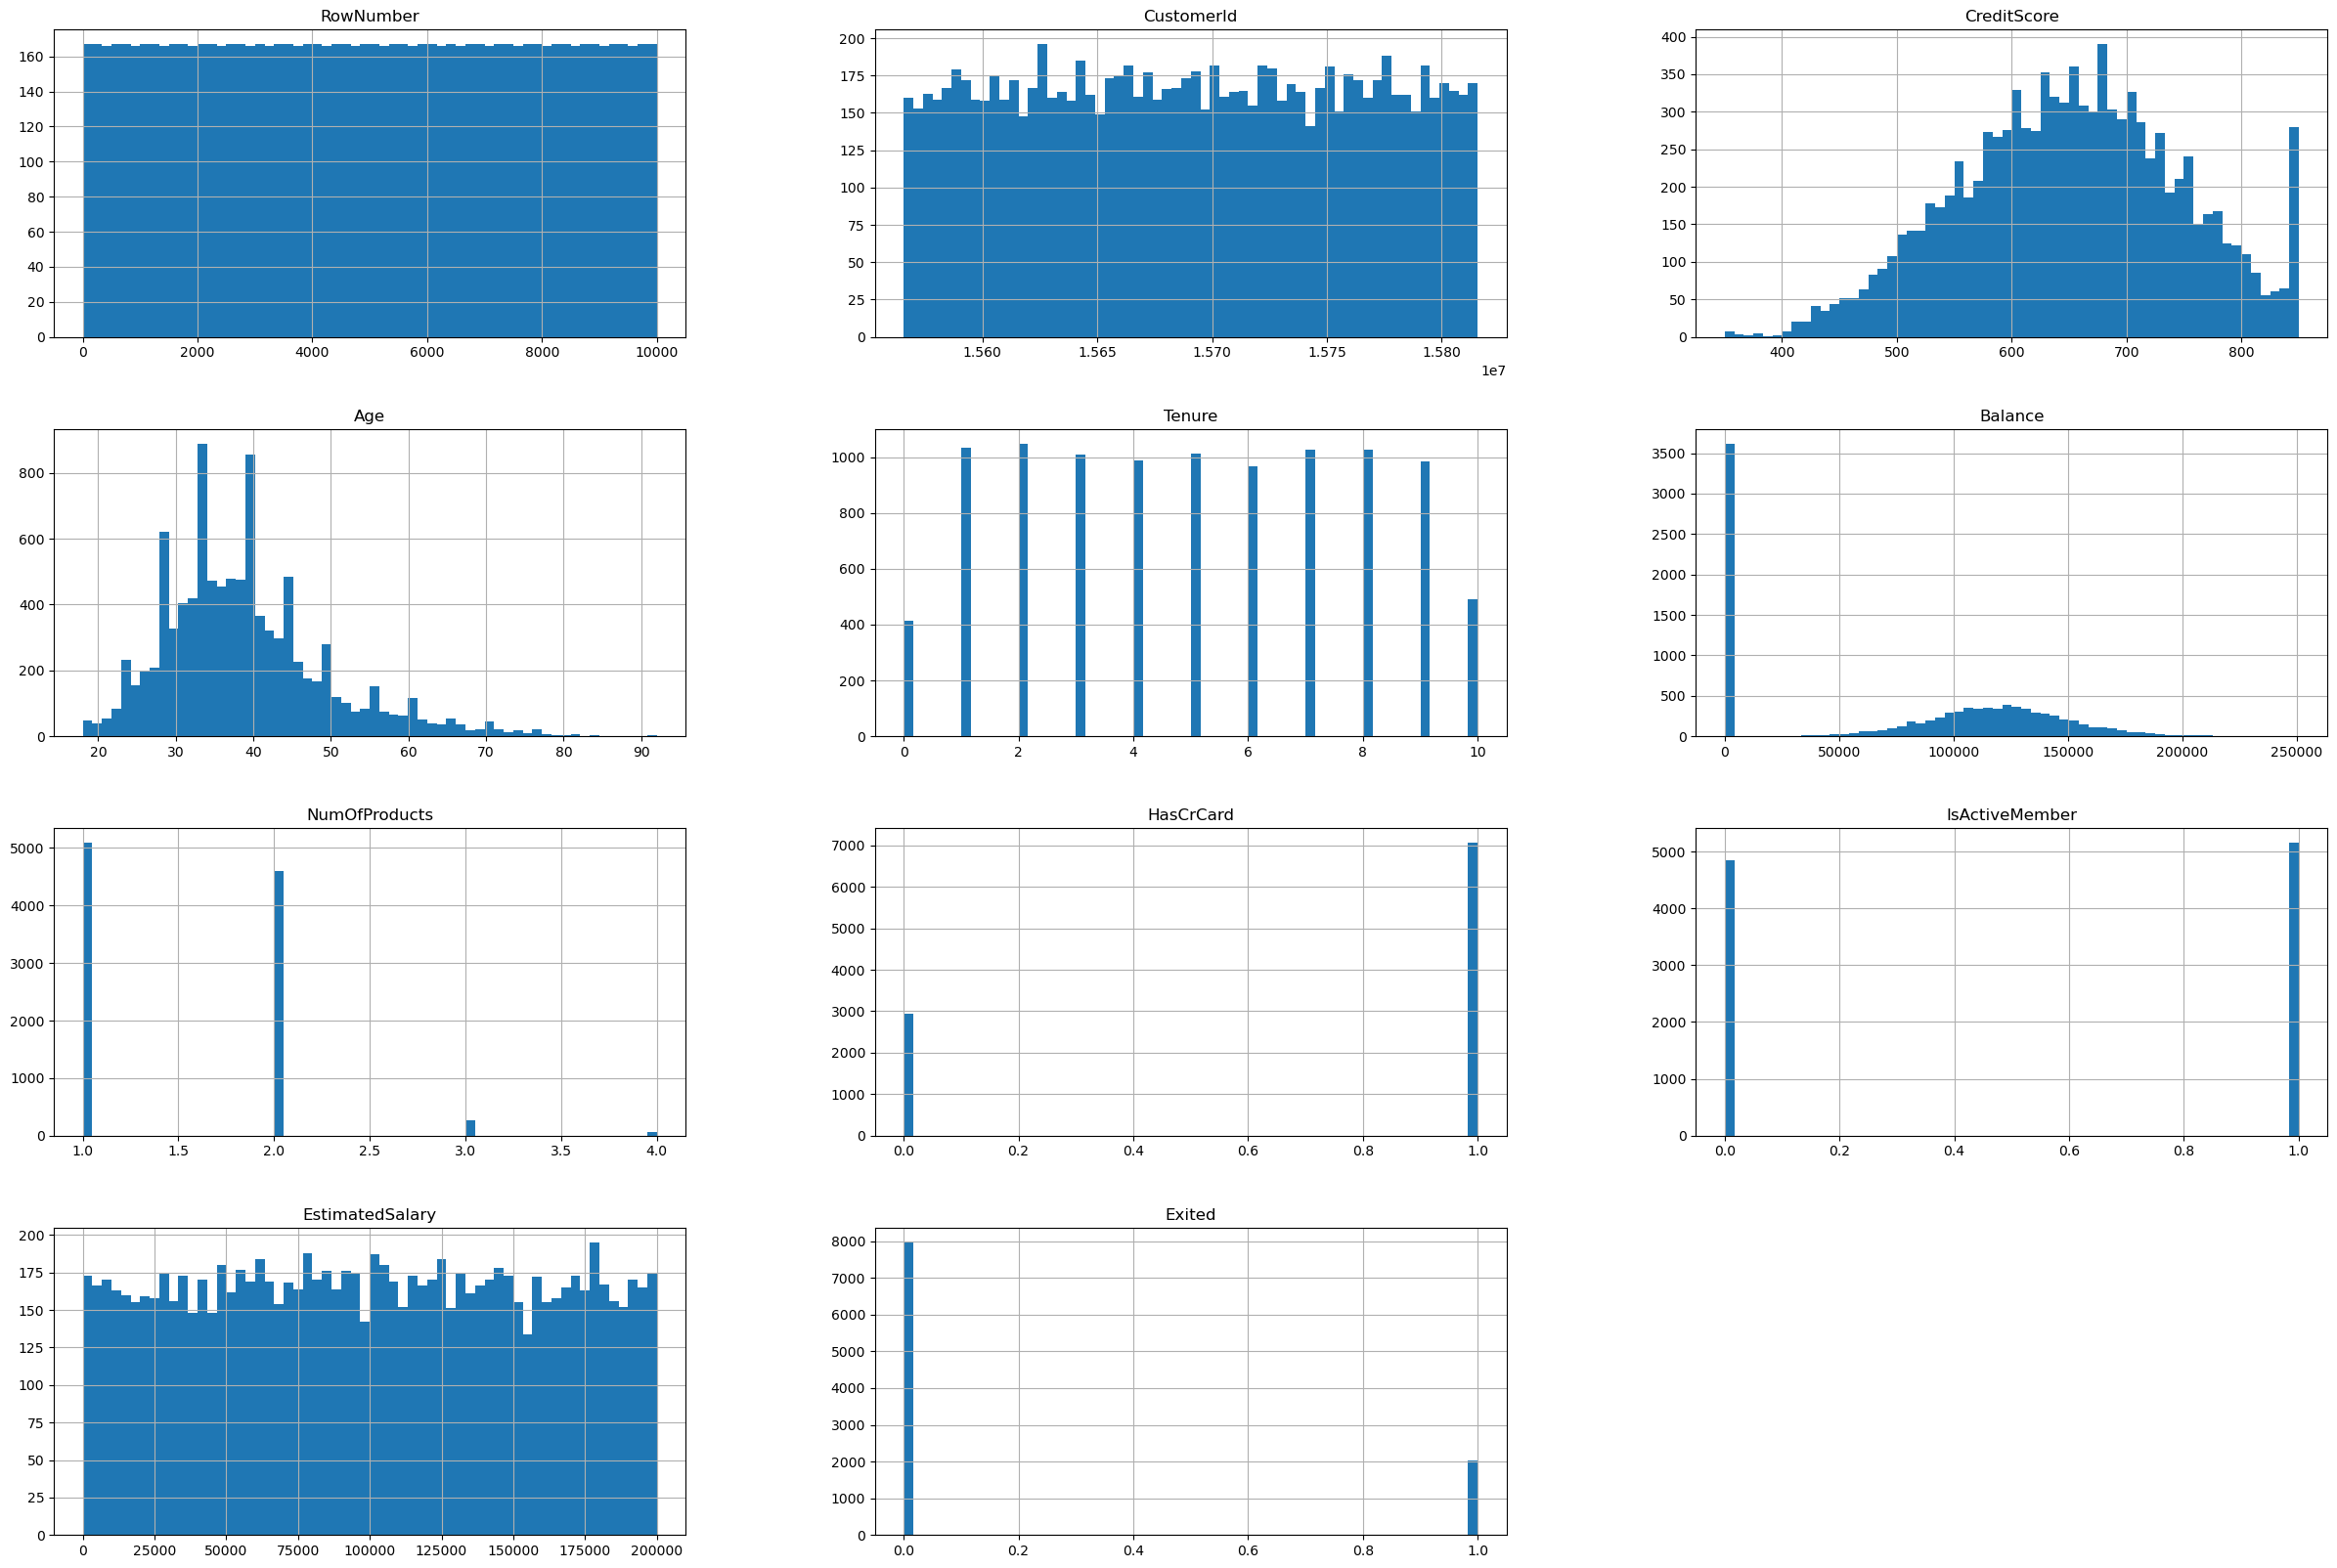

In [42]:
data.hist(bins = 60, figsize = (30,20))

Tenures data

In [50]:
pd.DataFrame(data['Tenure'].value_counts())

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413

<AxesSubplot:>

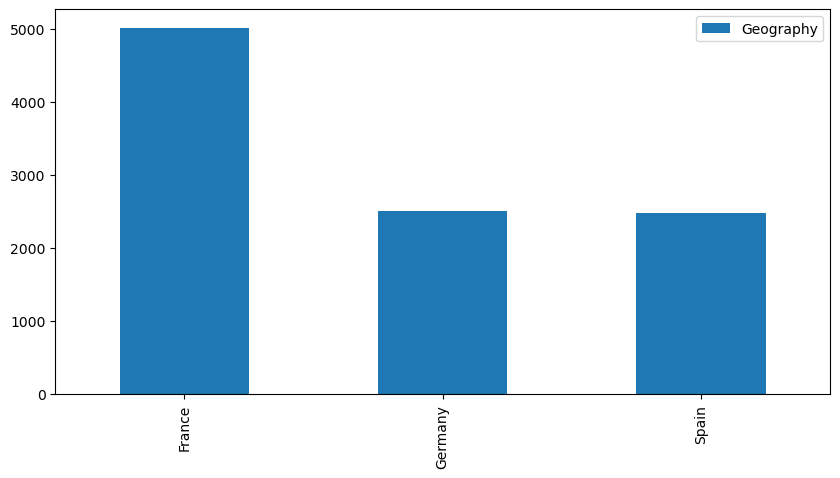

In [47]:
pd.DataFrame(data['Geography'].value_counts()).plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

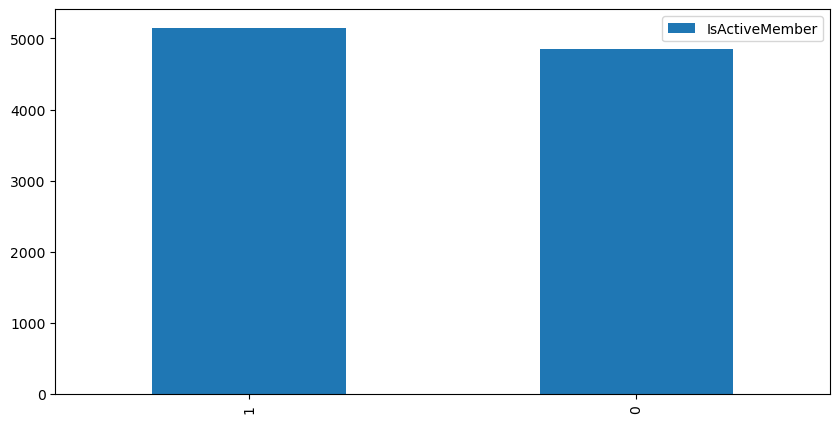

In [54]:
pd.DataFrame(data['IsActiveMember'].value_counts()).plot(kind='bar', figsize=(10,5))

In [62]:
stability = pd.pivot_table(data, index = 'Tenure', columns = 'IsActiveMember', values = 'Balance')

In [63]:
stability

IsActiveMember             0             1
Tenure                                    
0               74961.809742  84234.698630
1               76875.506953  79931.171230
2               78159.896516  75689.105429
3               80327.744763  75206.328645
4               72815.185174  75276.230360
5               75167.487213  77721.074506
6               77077.558996  71896.422685
7               76508.493915  74669.892879
8               80430.603735  75505.063044
9               77840.297057  75170.851210
10              76741.548963  71203.870120

<AxesSubplot:xlabel='Tenure'>

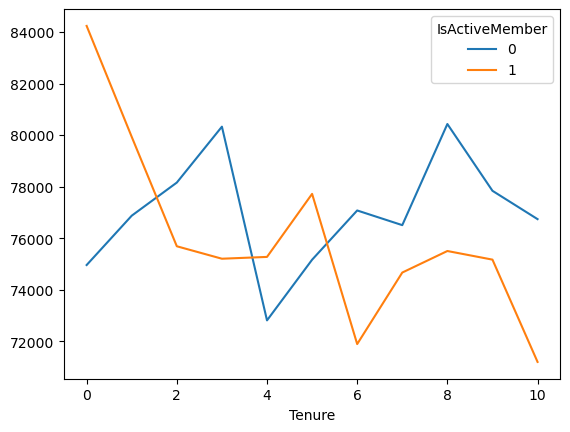

In [67]:
stability.plot()

<AxesSubplot:xlabel='Tenure'>

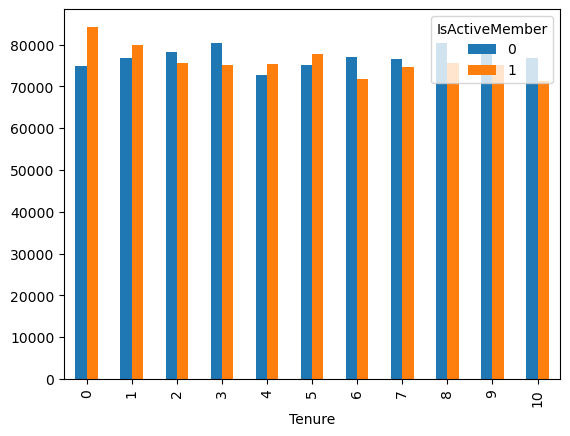

In [64]:
stability.plot(kind = 'bar')

LOGISTIC REGRESSION

Distribution of the target variable (Exited)

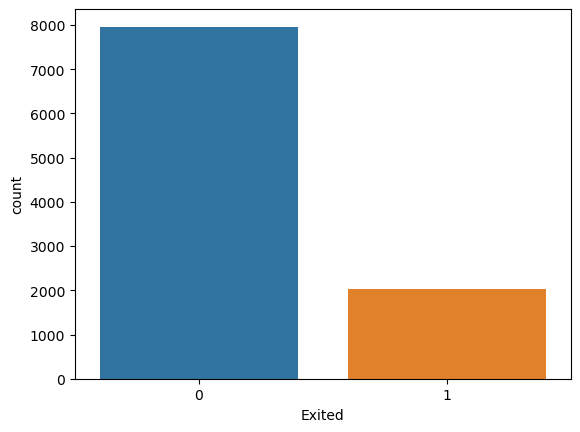

In [70]:
sns.countplot(x='Exited', dataf=data)
plt.show()

Distribution of other features and their relationship with the target variable

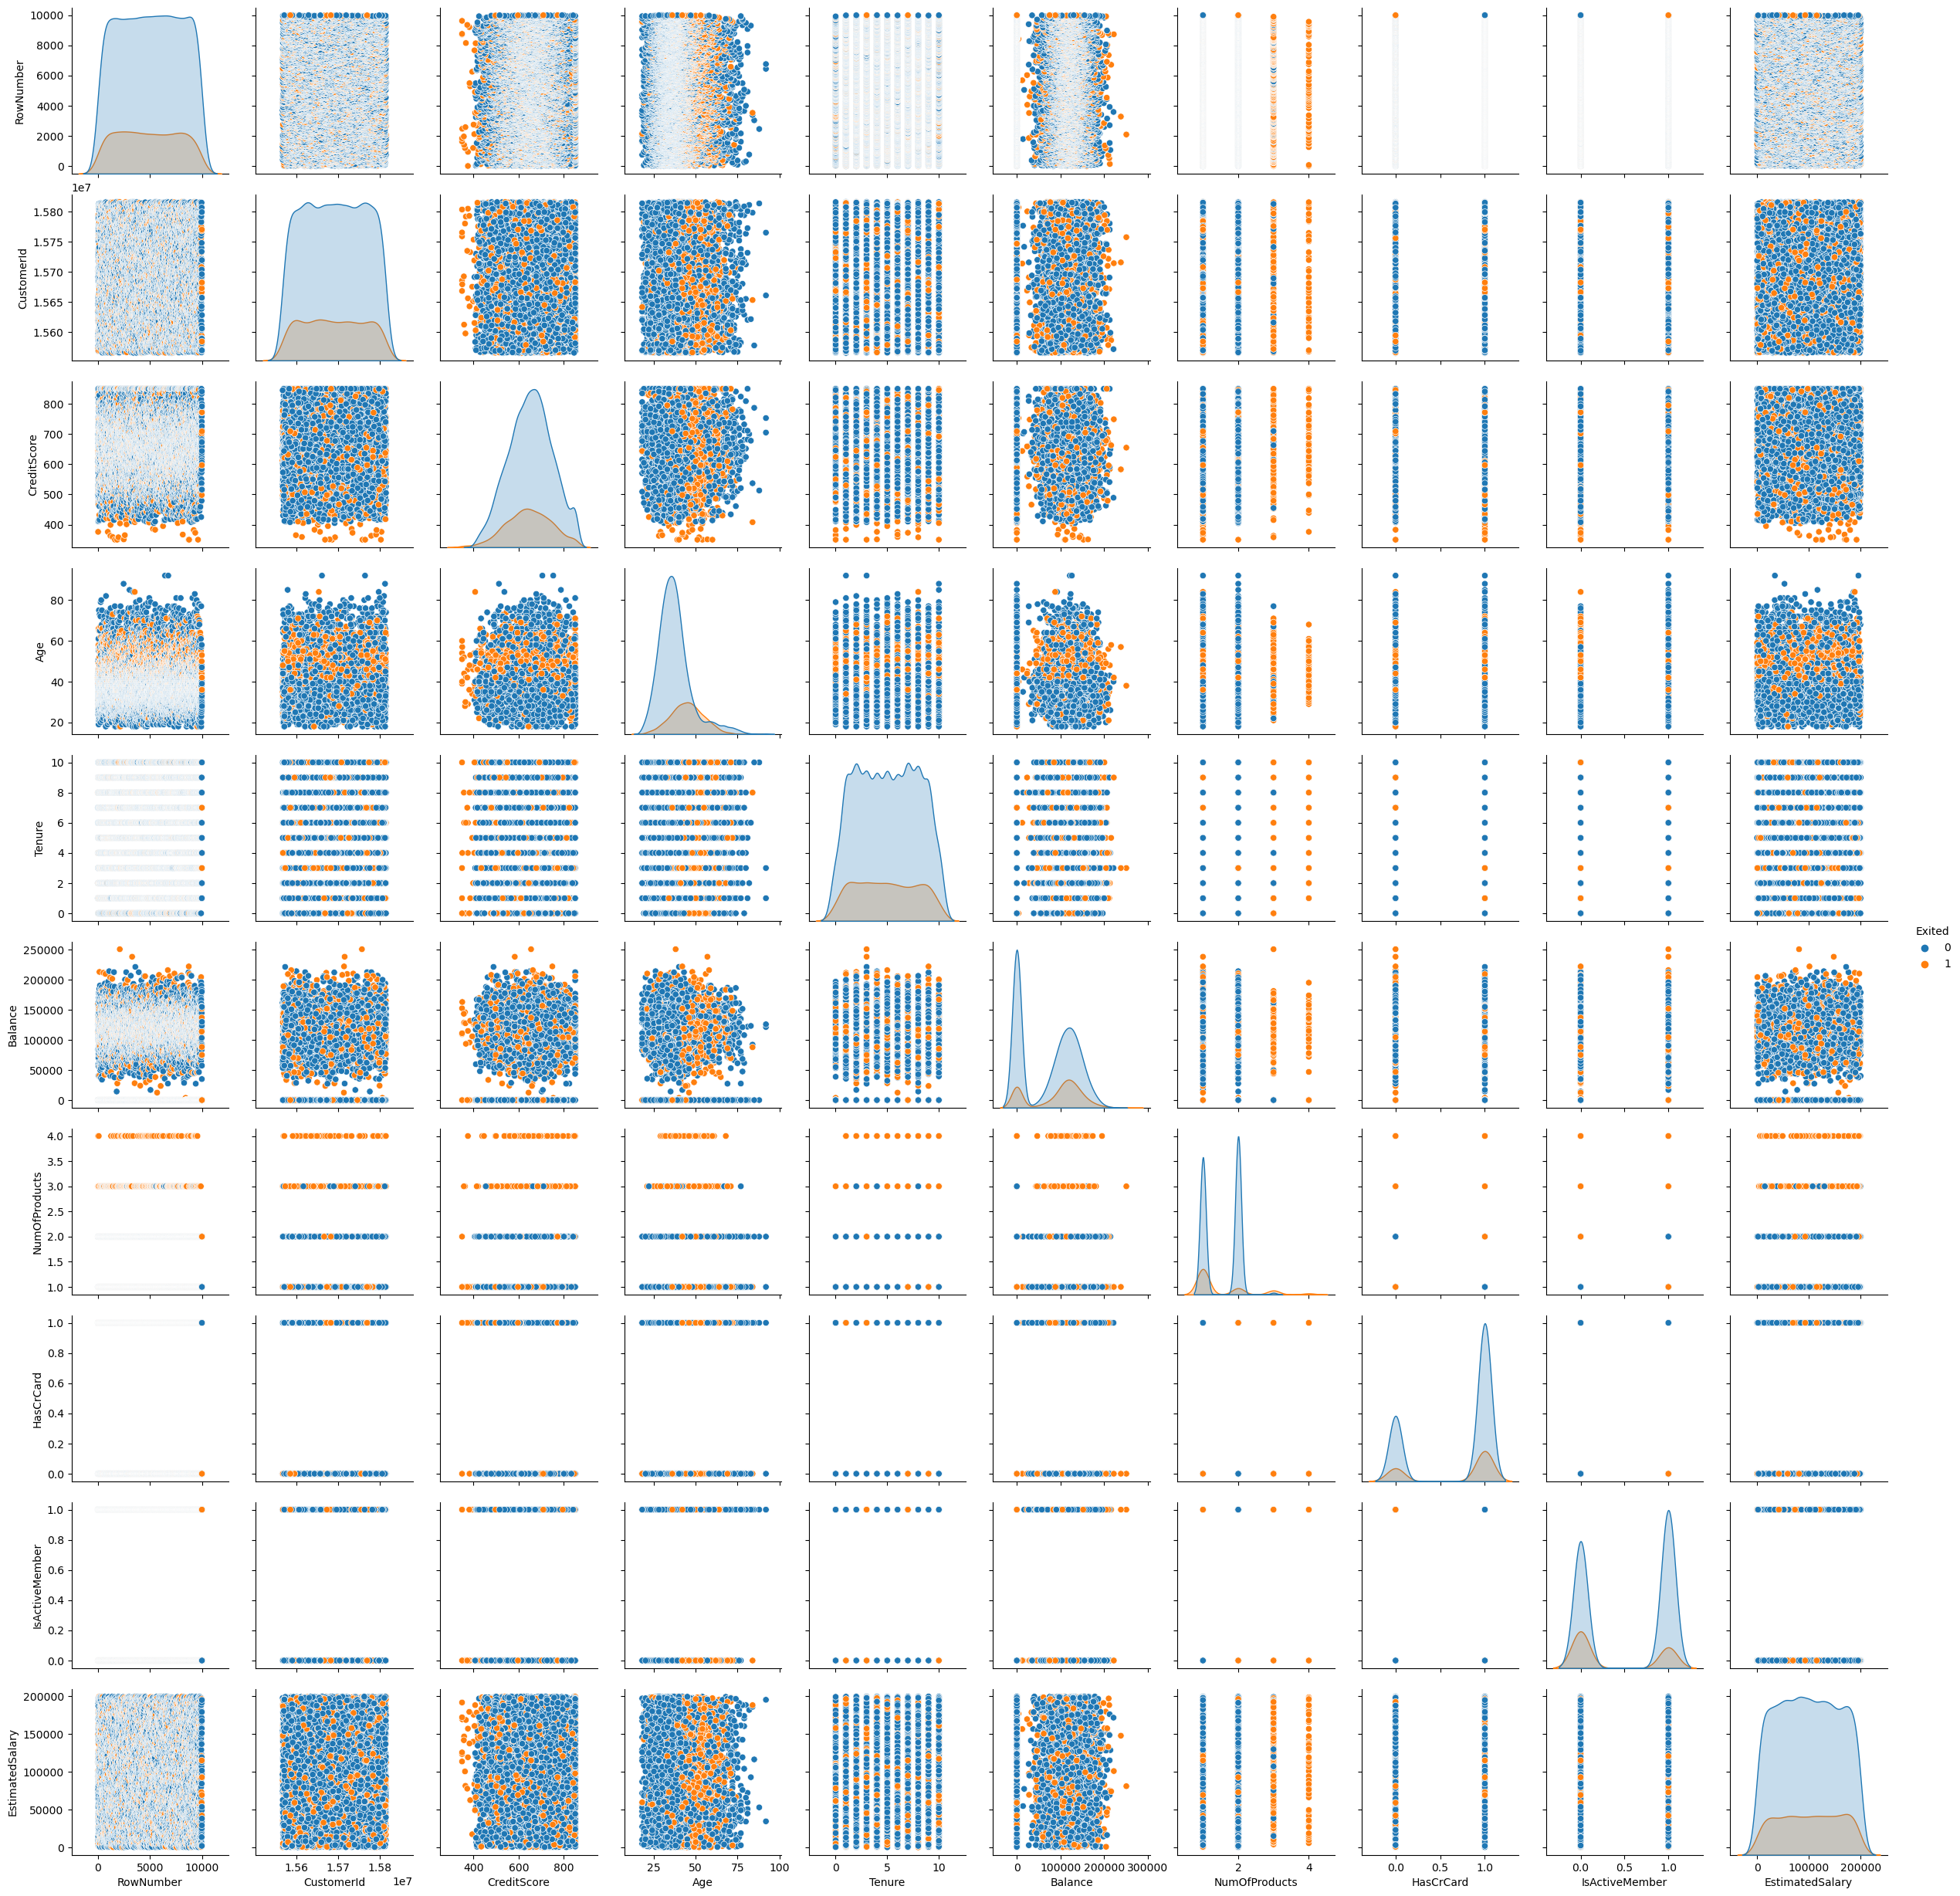

In [72]:
sns.pairplot(data, hue='Exited')
plt.show()

Prepare the data for modeling
Encoding categorical variables

In [73]:
data = pd.get_dummies(data, columns=['Geography', 'Gender', 'Surname'], drop_first=True)

Split the data into training and testing datasets

In [75]:
X = data.drop('Exited', axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Fit a logistic regression model

In [76]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Predict on the testing data

In [77]:
y_pred = logreg.predict(X_test)

Evaluate the model's performance

In [85]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1595    0]
 [ 405    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



C:\Users\Nasubo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nasubo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nasubo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Analyze the model's coefficients

In [86]:
coefs = pd.DataFrame({'Feature': X.columns, 'Coef': logreg.coef_[0]})
print(coefs)

               Feature          Coef
0            RowNumber -3.722502e-08
1           CustomerId -1.142235e-07
2          CreditScore -1.908259e-09
3                  Age  2.017393e-09
4               Tenure -5.158733e-11
...                ...           ...
2939   Surname_Zubarev -8.574459e-14
2940  Surname_Zubareva -4.341116e-14
2941      Surname_Zuev -4.335784e-14
2942     Surname_Zuyev  1.237615e-13
2943    Surname_Zuyeva -8.569532e-14

[2944 rows x 2 columns]
